In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("/home/abhishek/Projects/Quora/train.csv")

In [3]:
train_df.shape

(404290, 6)

In [4]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
train_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [7]:
#%matplotlib inline sets the backend of matplotlib to the 'inline' backend: 
#With this backend, the output of plotting commands is displayed inline within
#frontends like the Jupyter notebook, directly below the code cell that produced it.
#The resulting plots will then also be stored in the notebook document.

%matplotlib inline

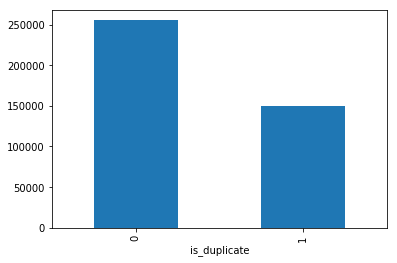

In [8]:
#Getting more insights about the data


train_df.groupby("is_duplicate")['id'].count().plot.bar()

In [9]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(train_df['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(train_df['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   63.08%

~> Question pairs are Similar (is_duplicate = 1):
   36.92%


In [10]:
import numpy as np

In [11]:
qids = pd.Series(train_df['qid1'].tolist() + train_df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

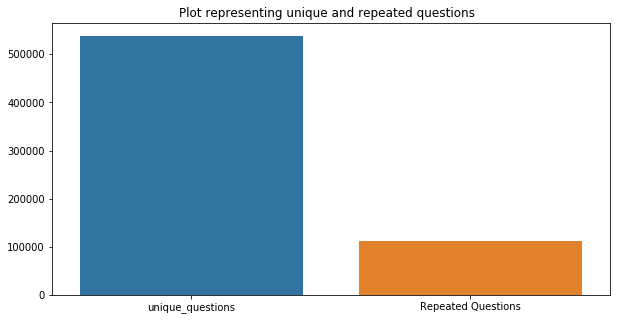

In [13]:

x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 5))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

In [14]:
#checking whether there are any repeated pair of questions

pair_duplicates = train_df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

#from the original shape of the dataframe we are substracting the shape of the grouped by dataframe.
print ("Number of duplicate questions",(pair_duplicates).shape[0] - train_df.shape[0])

Number of duplicate questions 0


In [24]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    train_df['freq_qid1'] = train_df.groupby('qid1')['qid1'].transform('count') 
    train_df['freq_qid2'] = train_df.groupby('qid2')['qid2'].transform('count')
    train_df['q1len'] = train_df['question1'].str.len() 
    train_df['q2len'] = train_df['question2'].str.len()
    train_df['q1_n_words'] = train_df['question1'].apply(lambda row: len(row.split(" ")))
    train_df['q2_n_words'] = train_df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    train_df['word_Common'] = train_df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    train_df['word_Total'] = train_df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    train_df['word_share'] = train_df.apply(normalized_word_share, axis=1)

    train_df['freq_q1+q2'] = train_df['freq_qid1']+train_df['freq_qid2']
    train_df['freq_q1-q2'] = abs(train_df['freq_qid1']-train_df['freq_qid2'])

    train_df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [25]:
print ("Minimum length of the questions in question1 : " , min(train_df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(train_df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", train_df[train_df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", train_df[train_df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 67
Number of Questions with minimum length [question2] : 24


Maximum number of times a single question is repeated: 157



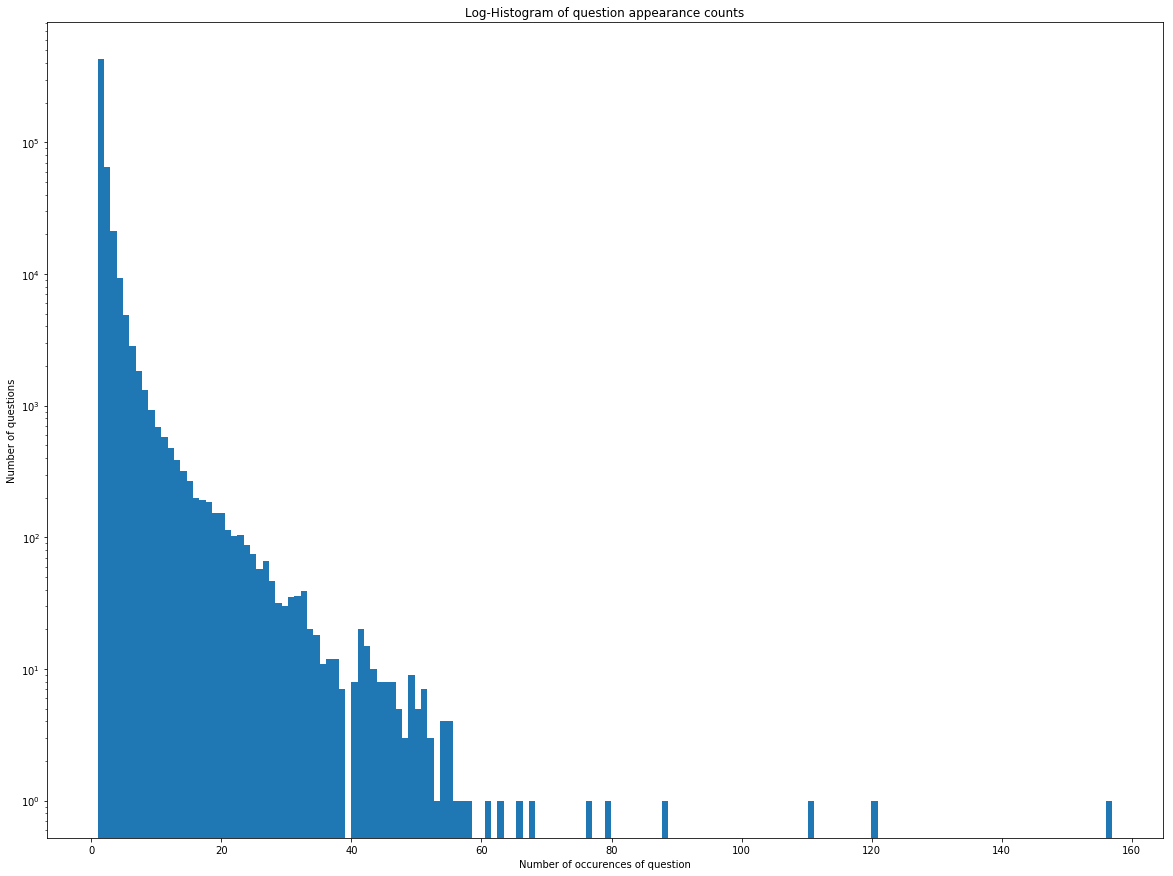

In [26]:
plt.figure(figsize=(20, 15))

plt.hist(qids.value_counts(), bins = 160)

plt.yscale('log', nonposy = 'clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

In [27]:
#Checking whether there are any rows with null values
nan_rows = train_df[train_df.isnull().any(1)]
nan_rows.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
105780,105780,174363,174364,How can I develop android app?,NaN,0,2,2,30,0,6,1,0.0,7.0,0.0,4,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0,1,2,32,0,7,1,0.0,8.0,0.0,3,1


In [28]:
# Filling the null values with ' '
train_df = train_df.fillna('')
nan_rows = train_df[train_df.isnull().any(1)]
print(nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_Common, word_Total, word_share, freq_q1+q2, freq_q1-q2]
Index: []


## Feature Extraction

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [29]:
import os

In [30]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    train_df = pd.read_csv("df_fe_without_preprocessing_train.csv")
else:
    #freq_qid1 = Frequency of qid1's
    #freq_qid2 = Frequency of qid2's
    train_df['freq_qid1'] = train_df.groupby('qid1')['qid1'].transform('count') 
    train_df['freq_qid2'] = train_df.groupby('qid2')['qid2'].transform('count')
    
    #q1len = Length of q1
    #q2len = Length of q2
    train_df['q1len'] = train_df['question1'].str.len() 
    train_df['q2len'] = train_df['question2'].str.len()
    
    #q1_n_words = Number of words in Question 1
    #q2_n_words = Number of words in Question 2
    train_df['q1_n_words'] = train_df['question1'].apply(lambda row: len(row.split(" ")))
    train_df['q2_n_words'] = train_df['question2'].apply(lambda row: len(row.split(" ")))
    

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    
    #word_Common = (Number of common unique words in Question 1 and Question 2)
    train_df['word_Common'] = train_df.apply(normalized_word_Common, axis=1)

    
    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    
    #word_Total =(Total num of words in Question 1 + Total num of words in Question 2)
    train_df['word_Total'] = train_df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    
    #word_share = (word_common)/(word_Total)
    train_df['word_share'] = train_df.apply(normalized_word_share, axis=1)

    #freq_q1+freq_q2 = sum total of frequency of qid1 and qid2
    train_df['freq_q1+q2'] = train_df['freq_qid1'] + train_df['freq_qid2']
    
    #freq_q1-freq_q2 = absolute difference of frequency of qid1 and qid2
    train_df['freq_q1-q2'] = abs(train_df['freq_qid1']-train_df['freq_qid2'])

    train_df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


#### Analysis of the extracted features

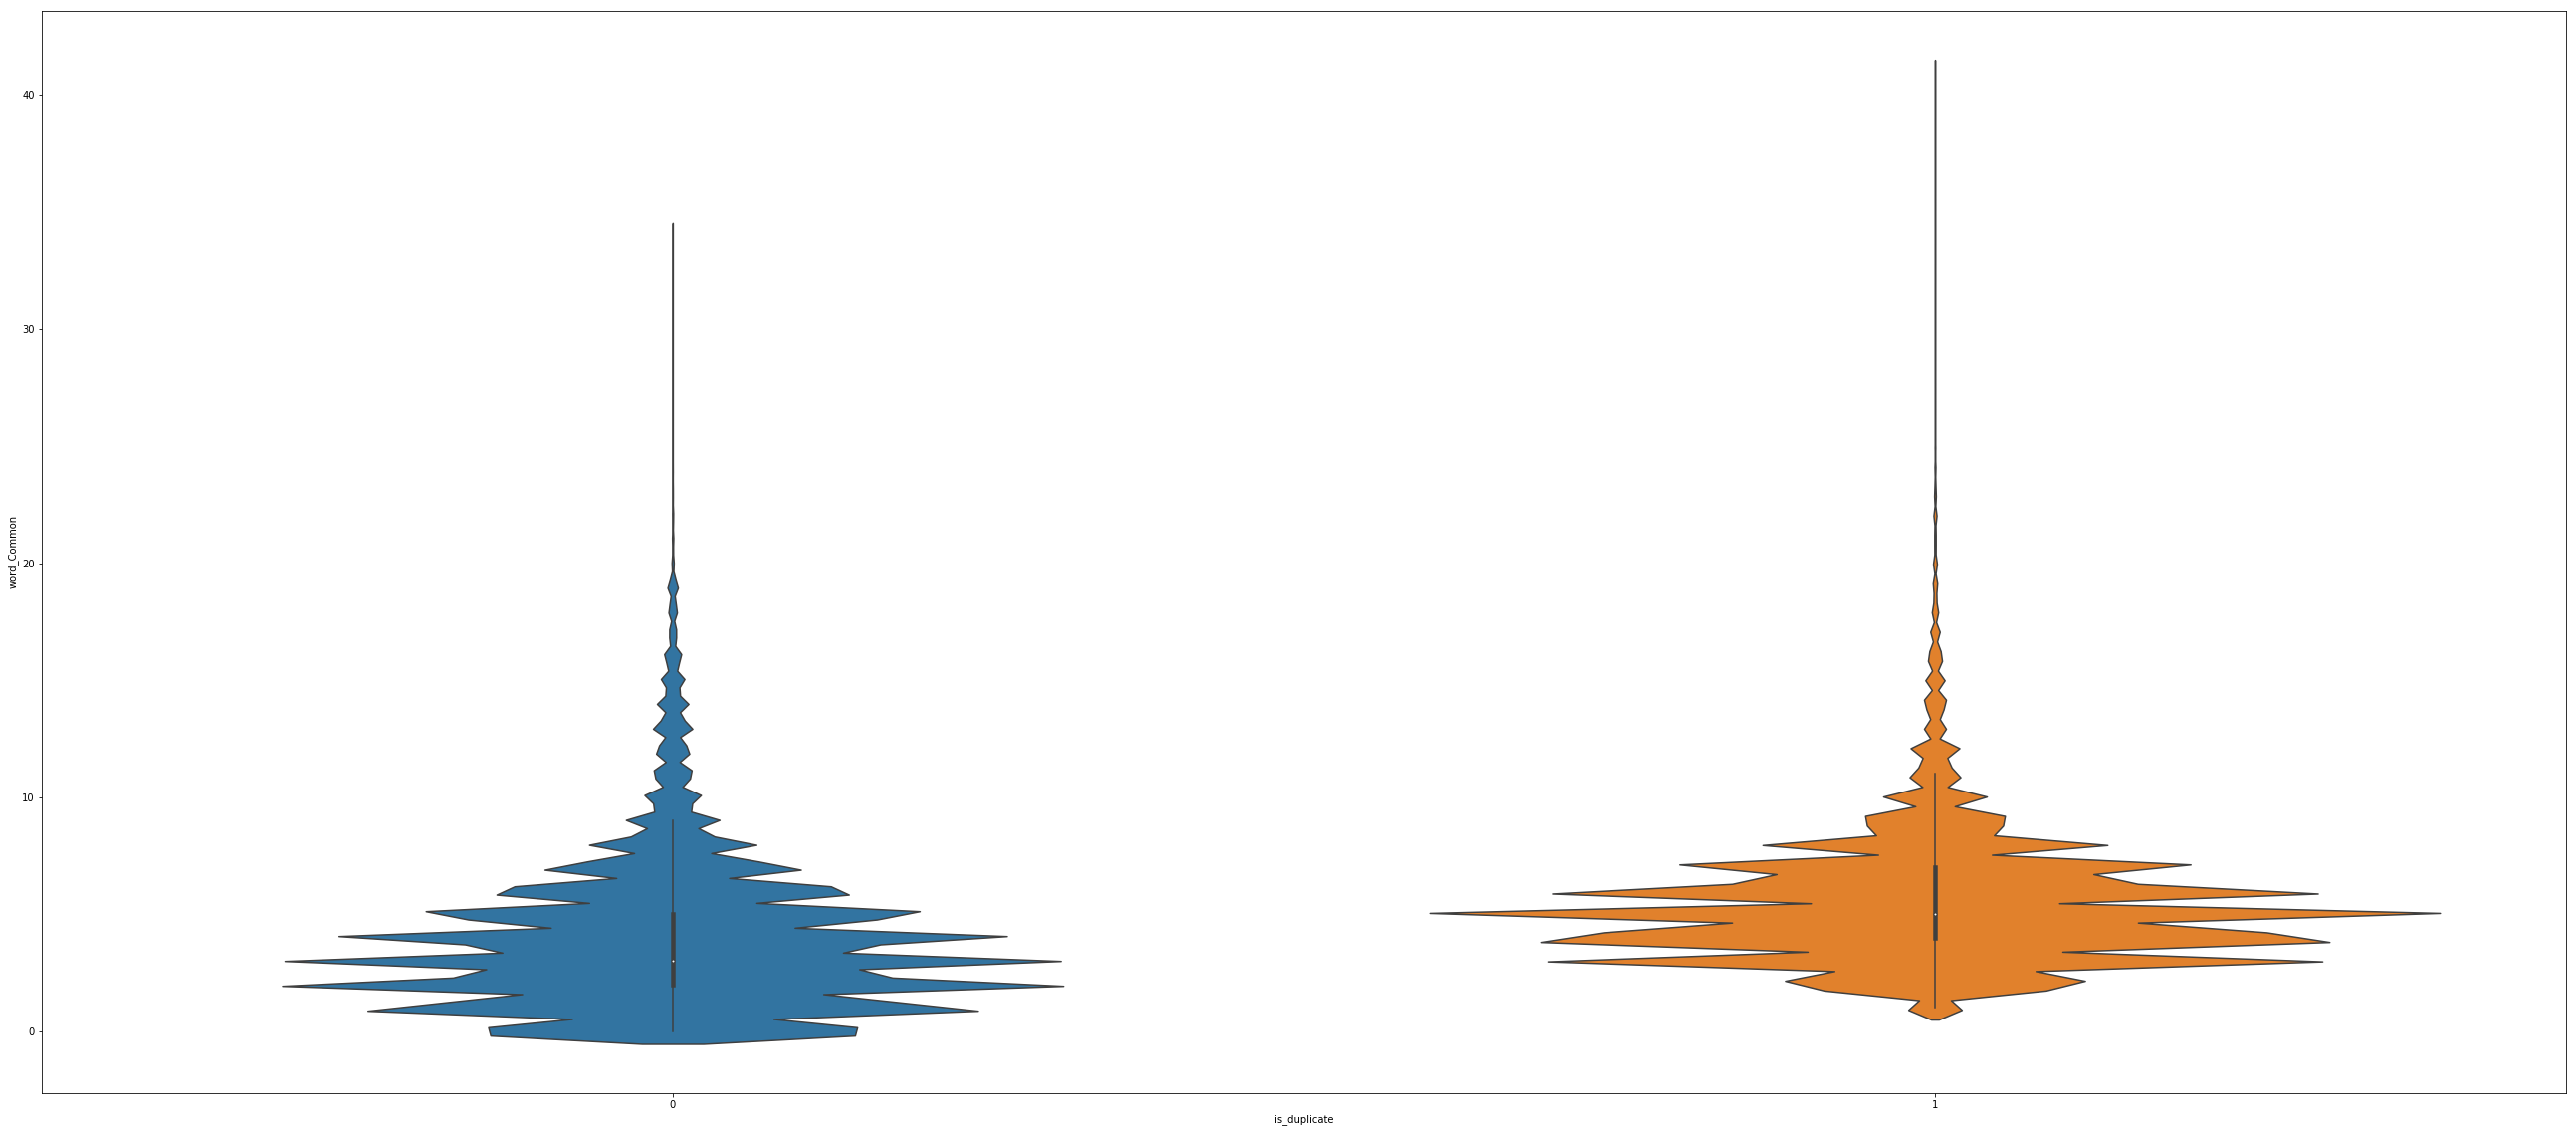

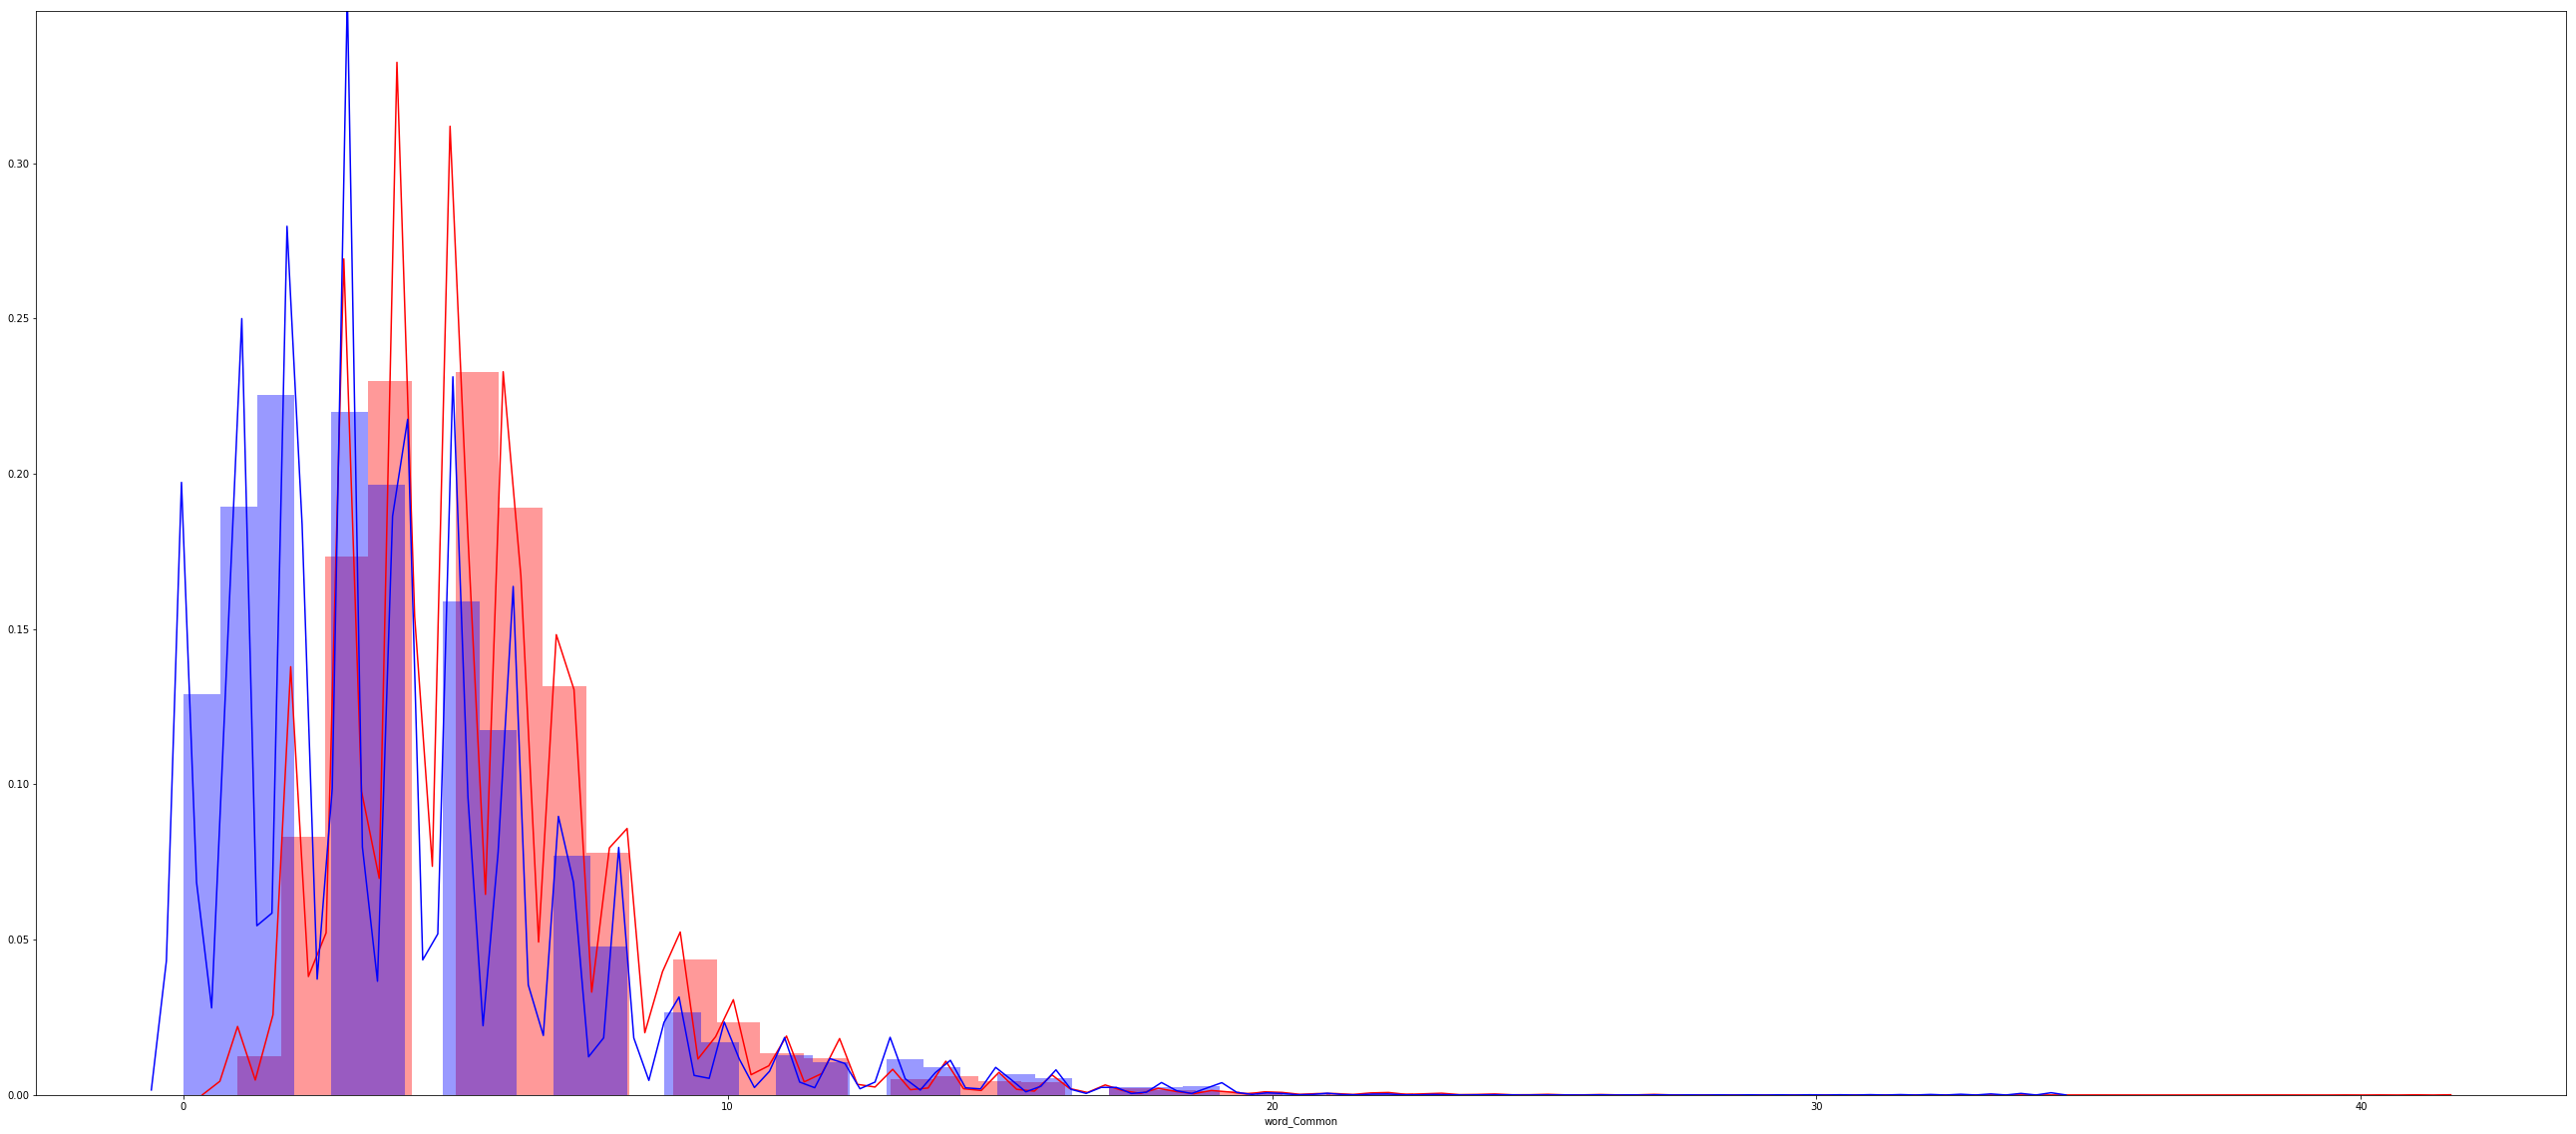

In [31]:
#Analysis for "word common feature" i.e. Number of common unique words in Question 1 and Question2.
plt.figure(figsize=(100, 20))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = train_df[0:])

plt.show()

plt.figure(figsize=(100, 20))
plt.subplot(1,2,2)

#Red colour for duplicate questions
sns.distplot(train_df[train_df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
#Blue colour for non-duplicate questions
sns.distplot(train_df[train_df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )

plt.show()

###### The distributions of the word_Common feature in similar and non-similar questions are highly overlapping

In [32]:
print('\n\n\n\n')

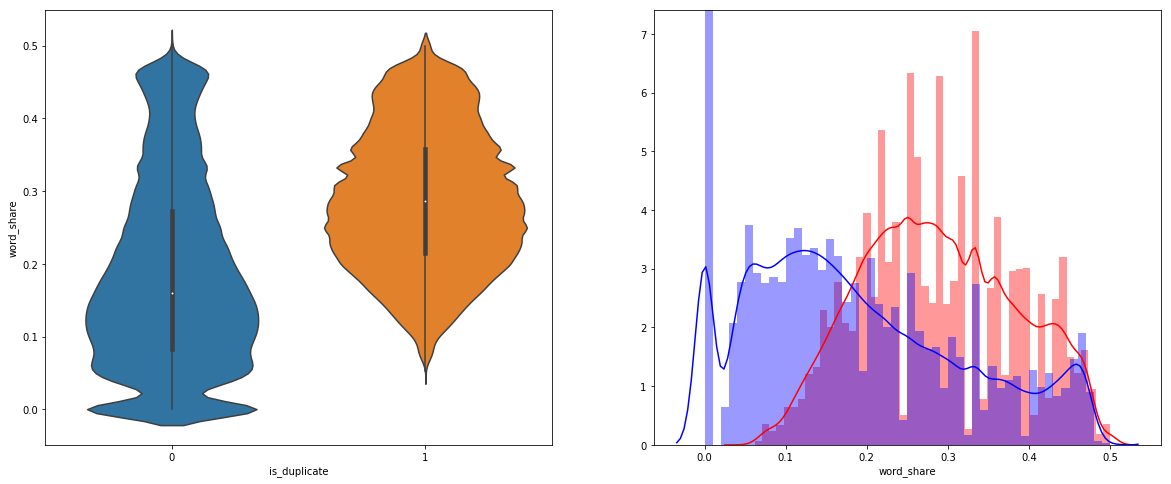

In [33]:
#Analysis for feature "word_share" where word_share = (word_common)/(word_Total)
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = train_df[0:])

plt.subplot(1,2,2)
#Red colour for duplicate question pairs
sns.distplot(train_df[train_df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
#Blue colour for non-duplicate question pairs
sns.distplot(train_df[train_df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )

plt.show()

### Inference

Graph 1 : 
1. If the word share is more, there is more consequentiality that the questions will be duplicate.

Graph 2 :
1. As the word share increases from 0, the number of duplicate question rises (giving our first inference a validity again).

or we can say :
The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate